# Método de Numerov

In [1]:
from pylab import *
from numpy import *
%matplotlib inline
from matplotlib import gridspec
from scipy.special import *

Método numérico que sirve para integrar ecuaciones de segundo orden de la forma
$$
\frac{d^2\psi}{dx^2}+k(x)\psi(x) = s(x)
$$

en un dominio [x_0,x_f]. Se toman un conjunto de puntos en este dominio,${x_n}$ igualmente espaciados (es decir $x_{n+1} = x_n + h$, con h algún paso constante). Si nombramos $k_{n} = k(x_n), s_{n} = s(x_n) , \psi_{n+1}= \psi(x_{n+1}) $, entonces $\psi_{n+1}$ en términos de cantidades evaluadas en $x_n$ y $x_{n+1}$ es:

$$
\psi_{n+1}= \frac{2(1-\frac{5}{12}h^2k_n)\psi_n-(1+\frac{1}{12}h^2k_{n-1})\psi_{n-1}+\frac{h^2}{12}(s_{n+1}+10s_n+s_{n-1})+O(h^6)}{1+\frac{1}{12}h^2 k_{n+1}}
$$



Se puede resolver también problemas de potencial central en 3D,  ya que para estos la función de onda es:

$$
\psi(x) = R(r) Y^l_m(\theta,\phi)
$$

con $R(r)$ resolviendo la ecuación

$$
\frac{d^2R}{dr^2}+2(E-V_E(r))R(r) = 0 
$$

y   $V_E = V(r)+ \frac{l(l+1)}{r^2}$



# Derivación

Expandimos la función alrededor de un punto $x_0$:
$$
\psi(x) = \psi(x_0) + (x-x_0)\psi'(x_0)+ \frac{(x-x_0)^2}{2!} \psi''(x_0)+ \frac{(x-x_0)^3}{3!} \psi'''(x_0)+ \frac{(x-x_0)^4}{4!} \psi''''(x_0) +\frac{(x-x_0)^5}{5!} \psi'''''(x_0)+ O(h^6)
$$

Denotamos por $h =x-x_0$ y escribimos lo anterior como

$$
\psi(x_0+h) = \psi(x_0) + h\psi'(x_0)+ \frac{h^2}{2!} \psi''(x_0)+ \frac{h^3}{3!} \psi'''(x_0)+ \frac{h^4}{4!} \psi''''(x_0) +\frac{h^5}{5!} \psi'''''(x_0)+ O(h^6)
$$

Discretizamos el espacio en un conjunto de puntos ${x_n}$ con separación h. Tomando en cuenta la expresión anterior, las expresiones de $\psi_{n+1}$ y $\psi_{n-1}$ en términos de $\psi_{n}$ son:
 $$
\psi_{n+1} = \psi_{n} + h\psi'_{n}+ \frac{h^2}{2!} \psi''_{n}+ \frac{h^3}{3!} \psi'''_{n}+ \frac{h^4}{4!} \psi''''_{n} +\frac{h^5}{5!} \psi'''''_{n}+ O(h^6)
$$

 $$
\psi_{n-1} = \psi_{n} - h\psi'_{n}+ \frac{h^2}{2!} \psi''_{n}- \frac{h^3}{3!} \psi'''_{n}+ \frac{h^4}{4!} \psi''''_{n} -\frac{h^5}{5!} \psi'''''_{n}+ O(h^6)
$$

Sumando las dos expresiones anteriores:
 $$
\psi_{n-1} + \psi_{n+1} = 2\psi_{n} + 2\frac{h^2}{2!} \psi''_{n}+ 2\frac{h^4}{4!} \psi''''_{n} + O(h^6)
$$

Podemos sustituir $\psi_n''=-k_n\psi_n+s_n$  y  $\psi_n''''=\frac{d^2}{dx^2}(-k(x)\psi(x)+s(x))|_{x = x_n} =\frac{d}{dx}(-k'(x)\psi(x)-k(x)\psi'(x)+s'(x))|_{x = x_n} = (-k''(x)\psi(x)-2k'(x)\psi'(x)-k(x)\psi''(x)+s''(x))|_{x = x_n}$

Sustituyendo esto en la expresión anterior (?) llegamos a la ecuación final

# Ecuación de Schrödinger en 1D

La ecuación de Schrödinger en 1D,  trabajando con unidades tales que $\hbar= m = 1$, es 

$$
\frac{d^2\psi}{dx^2}+2(E-V(x))\psi(x) = 0
$$

Para resolver el problema se debe de considerar adicionalmente condiciones de frontera, que generalmente se cumplirán sólo para ciertos valores de E


A continuación se programa una primera versión del método (pensando que conocemos el espectro del potencial)

In [2]:
def Norma(f,h):  #saca la norma de un arreglo con espaciado i
    norma = 0
    for i in range(len(f)):
        norma+=h*f[i]*conjugate(f[i])
    norma = sqrt(norma)
    return norma
    
def Numerov(V,p_ext, E,v_i,args ="0",h=0.01,error = 1):  
    x = arange(p_ext[0],p_ext[1]+h,h)
    sol = zeros(len(x))
    sol[0] = v_i[0]
    sol[1] = v_i[1]
    N = 0
    if args=="0":
        for j in range(len(x)-2):
                i = j+1
                k0 = -2*(V(x[i])-E)
                km1 = -2*(V(x[i-1])-E)
                kp1 = -2*(V(x[i+1])-E)
                f0= 1+k0*h**2*0.08333333333333333
                fm1= 1+km1*h**2*0.08333333333333333
                fp1= 1+kp1*h**2*0.08333333333333333
                sol[i+1]= ((12-10*f0)*sol[i]-fm1*sol[i-1])/fp1
    else:
        for j in range(len(x)-2):
                i = j+1
                k0 = -2*(V(x[i],args)-E)
                km1 = -2*(V(x[i-1],args)-E)
                kp1 = -2*(V(x[i+1],args)-E)
                f0= 1+k0*h**2*0.08333333333333333
                fm1= 1+km1*h**2*0.08333333333333333
                fp1= 1+kp1*h**2*0.08333333333333333
                sol[i+1]= ((12-10*f0)*sol[i]-fm1*sol[i-1])/fp1
    
    norma =Norma(sol,h)
    for i in range(len(sol)):
        sol[i] =sol[i]/norma
    if abs(sol[-1])>error:
        N = "Error"
        #print("Energía incorrecta")
    return x,sol,N





 ¿Qué pasa si no se conoce el espectro de energías del potencial a resolver?

¿Qué pasa, por ejemplo, si tratamos de resolver la ecuación de Schrödinger con un valor de E que no se encuentra en el espectro de energías? La ecuación no tendrá una solución tal que se cumplan las condiciones de frontera . Se usará el método de Numerov, pero esta vez se le dará al programa un arreglo de energías con las cuales se deberá de integrar la ecuación. Si existe solución aceptable entonces la energía y la función serán guardadas.



In [98]:


def V_punto(V,x,E):
    return V(x)-E

In [103]:
def  Numerov_ii(V,X,Energias,condiciones_ini,metodo,Nodos,args = "0",h=0.01,precision_en = .1 ,error = .01):
    x = arange(X[0],X[1]+h,h)
    if metodo=="Trivial":
        espectro = []
        funciones = []
        energias = arange(Energias[0],Energias[1]+precision_en,precision_en)
        for k in range(len(energias)):  
            x,solucion,N =  Numerov(V,X, energias[k],condiciones_ini,args,h,error) 
            if N != "Error":
                espectro.append(energias[k])
                funciones.append(solucion)

    if metodo=="Shooting":
        espectro = 0
        funciones = zeros(len(x))
        while (Energias[1]-Energias[0])> precision_en:
            E = (Energias[1]+Energias[0])/2
            nodos = 0
            sol = zeros(len(x))
            sol[0] = condiciones_ini[0]
            sol[1] = condiciones_ini[1]
            k = 0
            for j in range(len(x)-2):
                    i = j+1
                    k0 = -2*(V(x[i])-E)
                    km1 = -2*(V(x[i-1])-E)
                    kp1 = -2*(V(x[i+1])-E)
                    f0= 1+k0*h**2*0.08333333333333333
                    fm1= 1+km1*h**2*0.08333333333333333
                    fp1= 1+kp1*h**2*0.08333333333333333
                    sol[i+1]= ((12-10*f0)*sol[i]-fm1*sol[i-1])/fp1
                    
                    if sol[i+1]*sol[i]<0:  #Contabilizar nodos
                        nodos+=1
                    if  nodos>Nodos:   #Prueba para saber si la energía es muy alta
                        Energias = [Energias[0],E]
            if nodos<Nodos:  #Prueba para saber si la energía es muy baja
                Energias = [E,Energias[1]]
            if nodos==Nodos:
                if abs(sol[-1])<h:
                    break
                else:
                    En=Energias[(-1)**k*1]
                    if En-E<0:
                        Energias = [En,E]
                    else:
                        Energias = [E,En]
        norma =  Norma(sol,h)
        for i in range(len(sol)):
            funciones[i] = sol[i]/norma
        espectro = E
        
        
    if metodo == "Matching":
        espectro = 0
        funciones = 0
        error =10**(-4)
        energias = arange(Energias[0],Energias[1]+precision_en,precision_en)
        for i in range(len(energias)):
            E = energias[i] 
            x_d =X[1]
            x_i =X[0]
            pto_inv =  0.5*(x_i+x_d)
            y_i,y_d= V_punto(V,x_i,E),V_punto(V,x_d,E)
            n= 0
            while abs(pto_inv-x_d) >= error and abs(y_i-y_d) >= error :
                    y_m = V_punto(V,pto_inv,E)
                    if y_m==0:
                        break
                    if y_m * y_i < 0:
                        x_d = pto_inv
                    else:
                        x_i = pto_inv
                    pto_inv = 0.5*(x_i+x_d)
                    y_i , y_d =  V_punto(V,x_i,E) ,  V_punto(V,x_d,E) 
                    n+=1
            print(pto_inv)
        
        
    return espectro,x,funciones
        
    

In [105]:
E = [0.1,1]
Numerov_ii(V_oscilador,[x_0,x_1], E,[0,.01],"Matching",0,args = "0",h=0.01,precision_en = 10**(-4) ,error = 1)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


(0, array([ -2.00000000e+00,  -1.99000000e+00,  -1.98000000e+00,
         -1.97000000e+00,  -1.96000000e+00,  -1.95000000e+00,
         -1.94000000e+00,  -1.93000000e+00,  -1.92000000e+00,
         -1.91000000e+00,  -1.90000000e+00,  -1.89000000e+00,
         -1.88000000e+00,  -1.87000000e+00,  -1.86000000e+00,
         -1.85000000e+00,  -1.84000000e+00,  -1.83000000e+00,
         -1.82000000e+00,  -1.81000000e+00,  -1.80000000e+00,
         -1.79000000e+00,  -1.78000000e+00,  -1.77000000e+00,
         -1.76000000e+00,  -1.75000000e+00,  -1.74000000e+00,
         -1.73000000e+00,  -1.72000000e+00,  -1.71000000e+00,
         -1.70000000e+00,  -1.69000000e+00,  -1.68000000e+00,
         -1.67000000e+00,  -1.66000000e+00,  -1.65000000e+00,
         -1.64000000e+00,  -1.63000000e+00,  -1.62000000e+00,
         -1.61000000e+00,  -1.60000000e+00,  -1.59000000e+00,
         -1.58000000e+00,  -1.57000000e+00,  -1.56000000e+00,
         -1.55000000e+00,  -1.54000000e+00,  -1.53000000e+00,
     

# Oscilador Armónico (con energías desconocidas)

Notemos que para aplicar el método es necesario conocer primero los niveles de energía del sistema que se está tratando. En esta sección usamos el oscilador para comprobar que el método de Numerov funciona. Programamos el potencial,

$$
V(x) = \frac{m \omega^2 x^2}{2}
$$

$$
E_n = \hbar \omega (n+\frac{1}{2})
$$
 Donde las fucniones de onda son:
$$
\psi_n = (\frac{\alpha}{\pi})^{\frac{1}{4}}\frac{1}{\sqrt{2^n n!}} H_n(x) e^{-x^2/2}  
$$

con $\alpha = \frac{m \omega}{\hbar}$

In [5]:
omega = 1

def V_oscilador(x,o = omega):
    V = o**2*x**2/2
    return V
def E_oscilador(n,o = omega):
    E = o*(n+0.5)
    return E

def funcion_osc(x,n):
    psi =(1/pi)**(.25)*hermite(n)(x)*exp(-x**2/2)/sqrt(2**n*factorial(n))
    return  psi
    
    

Resolvemos ahora para el estado base y los 3 primeros estados excitados.

In [51]:
E = [0.4,4]
x_0 = -4
x_1 = 4
Energias,x,funciones = Numerov_ii(V_oscilador,[x_0,x_1], E,[0,.01],"Trivial",1,args = "0",h=0.1,precision_en = .01 ,error = .1)
e_s = []
f_s = []
for i in range(4):
    en,xs,f = Numerov_ii(V_oscilador,[x_0,x_1], E,[0,.01],"Shooting",i,args = "0",h=0.01,precision_en = 10**(-4) ,error = 1)
    e_s.append(en)
    f_s.append(f)

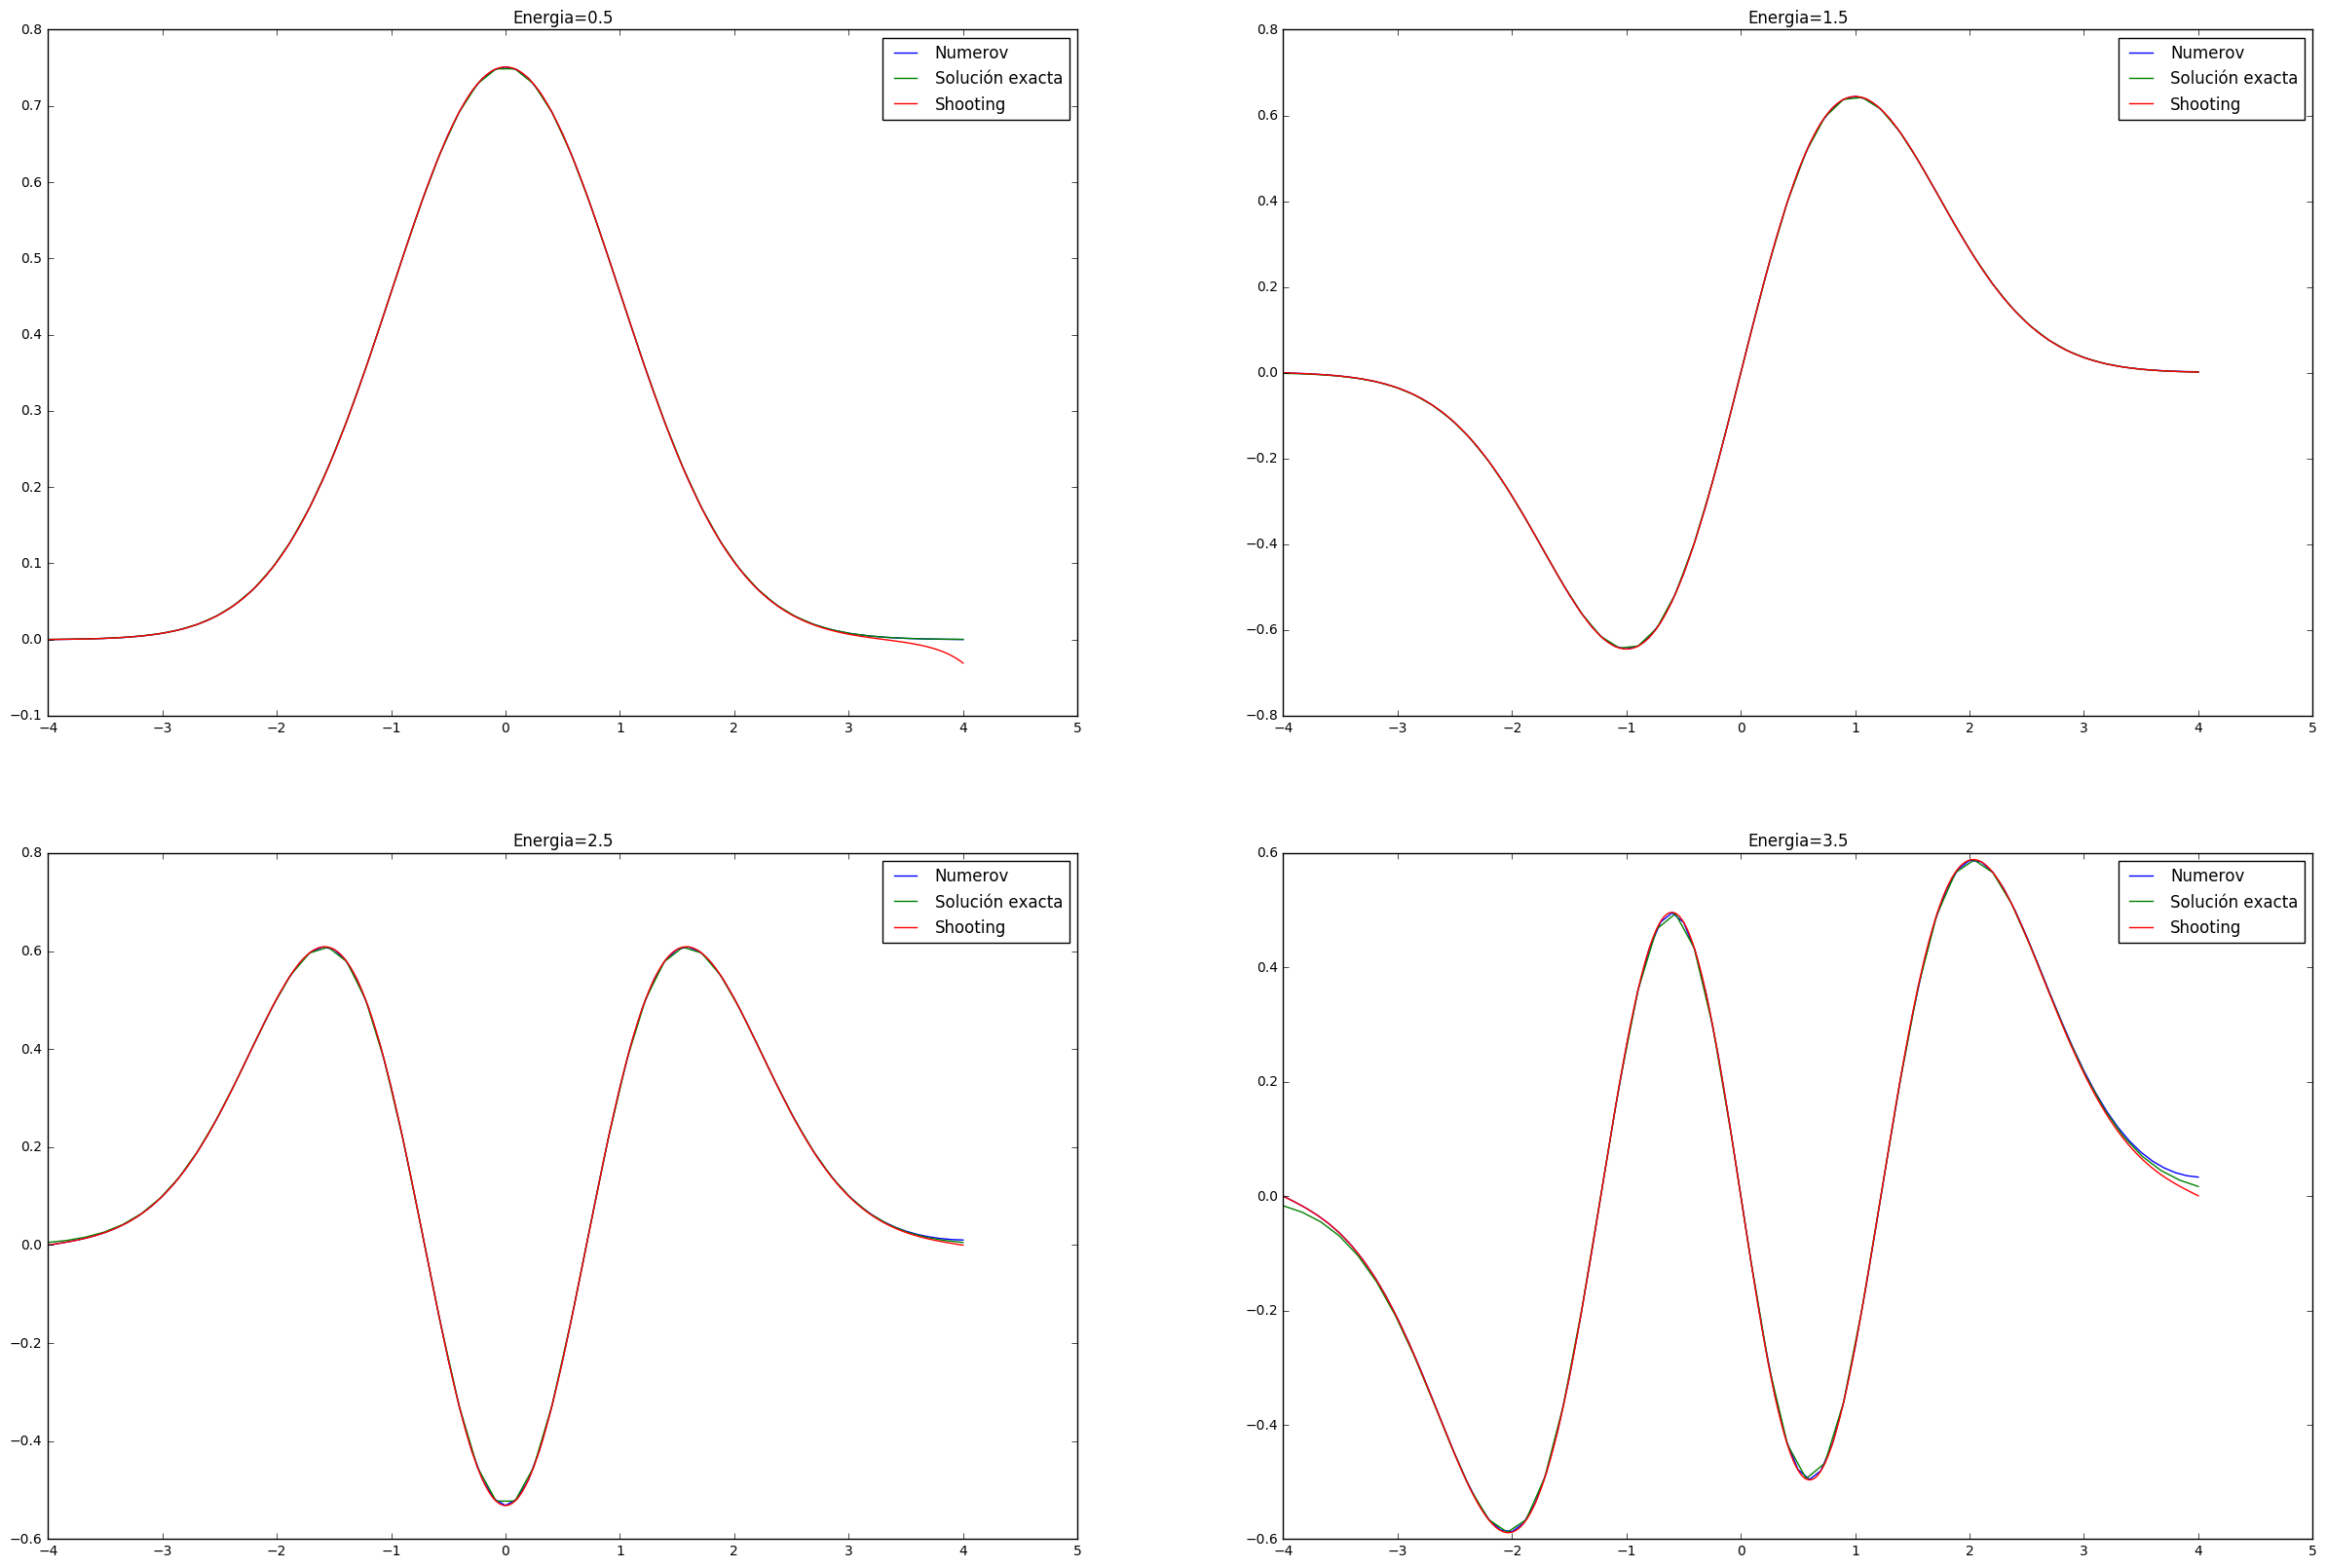

In [55]:
fig = figure(figsize=(30,20))
base =fig.add_subplot(221)
primero = fig.add_subplot(222)
segundo = fig.add_subplot(223)
tercero = fig.add_subplot(224)
graficas = [base, primero, segundo, tercero]
titulos = ["Estado base", "Primer estado excitado", "Segundo estado excitado", "Tercer estado excitado"]

for i in range(4):
    graficas[i].plot(x,(-1)**i*funciones[i], label = "Numerov")  #El (-1) es para dar la paridad correcta
    y=linspace(x_0,x_1)
    graficas[i].plot(y,funcion_osc(y,i), label = "Solución exacta")
    graficas[i].plot(xs,(-1)**i*f_s[i], label = "Shooting") 
    graficas[i].legend()
    graficas[i].set_title("Energia=%s" %Energias[i])

# Átomo de hidrógeno con energías desconocidas

In [5]:
def V_hidrogeno(r,l):
    V = l*(l+1)/r**2-1/(4*pi*r)
    return V

# Oscilador anarmónico

Tratamos a continuación el potencial de oscilador anarmónico, que tiene la forma
$$
V(x) = \frac{m (\omega^2 x^2+gx^4)}{2}
$$

con g algún parámetro fijo que determina que tan fuerte es el término anarmónico.

In [85]:
omega = 1

def V_oscilador_ana(x,a =0.05 ,o = omega):
    V = o**2*x**2/2+a*x**4
    return V



In [86]:
x_0 = -2
x_1 =2
E = [0.5,11]
e_s = []
f_s = []
for i in range(10):
    en,xs,f = Numerov_ii(V_oscilador_ana,[x_0,x_1], E,[0,.01],"Shooting",i,args = "0",h=0.01,precision_en = 10**(-5) ,error = 1)

    e_s.append(en)
    f_s.append(f)
print(e_s)

[0.5579986572265625, 1.8355712890625, 3.5146484375, 5.708984375, 8.498046875, 10.999994993209839, 10.999994993209839, 10.999994993209839, 10.999994993209839, 10.999994993209839]


In [ ]:
En caso del átomo de hidrógeno   $V_E = \frac{-e^2}{4 \pi \epsilon_0 r}+ \frac{l(l+1)}{r^2}$. La energía del átomo de hidrógeno es $E_n = -\frac{m}{2 \hbar^2 n^2}(\frac{e^2}{4 \pi \epsilon_0})^2 = -\frac{1}{2}(\frac{1}{4 \pi n})^2$. Recordamos también que $l<n$ y $|m|<=l$
No podemos resolver esta ecuación en un dominio infinito. Dado que para la mayoría de los potenciales se cumple que $\psi(x) \rightarrow 0$ si $|x| \rightarrow \infty$ como aproximación elegiremos los puntos extremos del dominio de integración tal que estén lo suficientemente lejos de la región donde la función de onda no se puede aproximar a cero.

Ventajas sobre Runge-Kutta de orden 4: Tiene un error de orden más alto  y no demanda tantos pasos para obtener el resultado.

# Matching Point

Se encuentra un punto donde se unirán las dos soluciones. La condición de que la solución sea continua es trivial.